In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('./data/penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [10]:
df.shape

(344, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),344.0,43.925000,5.443792,32.10000,39.275000,44.450000,48.500000,59.60000
Culmen Depth (mm),344.0,17.152035,1.969060,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),344.0,200.892442,14.023826,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),344.0,4200.872093,799.696532,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),344.0,8.730086,0.540630,7.63220,8.307415,8.652405,9.136170,10.02544
Delta 13 C (o/oo),344.0,-25.691855,0.779277,-27.01854,-26.285460,-25.833520,-25.089467,-23.78767


In [12]:
numericalCol = 0
categoricalCol = 0

numericalColList = []
categoricalColList = []

for col in df.columns:
    if df[col].dtype == 'object':
        categoricalCol += 1
        categoricalColList.append(col)
    else:
        numericalCol += 1
        numericalColList.append(col)

In [13]:
print("Numerical columns = ", numericalCol, " : ", numericalColList)
print("Categorical columns = ", categoricalCol, " : ", categoricalColList)

Numerical columns =  7  :  ['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
Categorical columns =  10  :  ['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex', 'Comments']


In [14]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_median = SimpleImputer(strategy='median', missing_values=np.nan)
imp_mode = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# imp_constant = SimpleImputer(strategy='constant', missing_values=np.nan)
# imp_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
# imp_zero = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0)
# imp_min = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=-1)
# imp_max = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=1)
# imp_25 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.25)
# imp_75 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.75)
# imp_50 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=0.5)
# imp_100 = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=1.0)

In [15]:
df_num = pd.DataFrame(imp_median.fit_transform(df[numericalColList]), columns=numericalColList)
df_cat = pd.DataFrame(imp_mode.fit_transform(df[categoricalColList]), columns=categoricalColList)

In [16]:
df_cat.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex,Comments
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,MALE,Not enough blood for isotopes.
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,FEMALE,Nest never observed with full clutch.
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,FEMALE,Nest never observed with full clutch.
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,MALE,Adult not sampled.
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,FEMALE,Nest never observed with full clutch.


In [20]:
df = pd.concat([df_num, df_cat], axis=1)

In [22]:
df.head()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex,Comments
0,1.0,39.10,18.7,181.0,3750.0,8.652405,-25.83352,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,MALE,Not enough blood for isotopes.
1,2.0,39.50,17.4,186.0,3800.0,8.949560,-24.69454,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,FEMALE,Nest never observed with full clutch.
2,3.0,40.30,18.0,195.0,3250.0,8.368210,-25.33302,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,FEMALE,Nest never observed with full clutch.
3,4.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,MALE,Adult not sampled.
4,5.0,36.70,19.3,193.0,3450.0,8.766510,-25.32426,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,FEMALE,Nest never observed with full clutch.


In [24]:
df.columns

Index(['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'studyName', 'Species', 'Region', 'Island',
       'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex',
       'Comments'],
      dtype='object')

[]

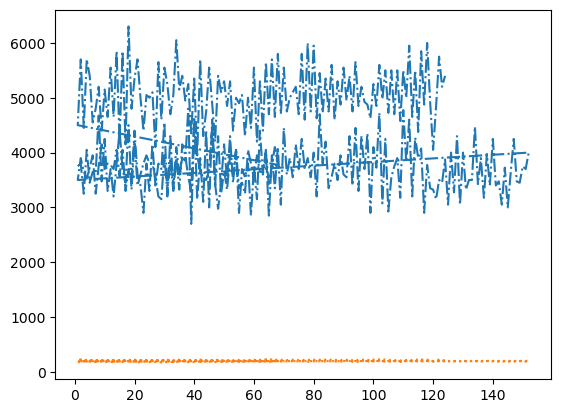

In [37]:
plt.plot(df["Sample Number"], df["Body Mass (g)"], label="Line1", linestyle="-.")
plt.plot(df["Sample Number"], df["Flipper Length (mm)"], label="Line2", linestyle=":")
plt.plot()

## MinMax Scaling / Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
MinMax = MinMaxScaler.fit_transform(df[numericalColList])
print(MinMax)

[[0.         0.25454545 0.66666667 ... 0.29166667 0.42628612 0.36678046]
 [0.00662252 0.26909091 0.51190476 ... 0.30555556 0.55045044 0.7193109 ]
 [0.01324503 0.29818182 0.58333333 ... 0.15277778 0.30753706 0.5216923 ]
 ...
 [0.8013245  0.66545455 0.30952381 ... 0.84722222 0.27972957 0.30250985]
 [0.80794702 0.47636364 0.20238095 ... 0.69444444 0.25499323 0.2782068 ]
 [0.81456954 0.64727273 0.35714286 ... 0.75       0.30573616 0.2671819 ]]


In [32]:
df[numericalColList]

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.0,39.10,18.7,181.0,3750.0,8.652405,-25.83352
1,2.0,39.50,17.4,186.0,3800.0,8.949560,-24.69454
2,3.0,40.30,18.0,195.0,3250.0,8.368210,-25.33302
3,4.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
4,5.0,36.70,19.3,193.0,3450.0,8.766510,-25.32426
...,...,...,...,...,...,...,...
339,120.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
340,121.0,46.80,14.3,215.0,4850.0,8.411510,-26.13832
341,122.0,50.40,15.7,222.0,5750.0,8.301660,-26.04117
342,123.0,45.20,14.8,212.0,5200.0,8.242460,-26.11969


In [33]:
minMaxDf = pd.DataFrame(MinMax, columns=numericalColList)
minMaxDf

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.000000,0.254545,0.666667,0.152542,0.291667,0.426286,0.366780
1,0.006623,0.269091,0.511905,0.237288,0.305556,0.550450,0.719311
2,0.013245,0.298182,0.583333,0.389831,0.152778,0.307537,0.521692
3,0.019868,0.449091,0.500000,0.423729,0.375000,0.426286,0.366780
4,0.026490,0.167273,0.738095,0.355932,0.208333,0.473964,0.524404
...,...,...,...,...,...,...,...
339,0.788079,0.449091,0.500000,0.423729,0.375000,0.426286,0.366780
340,0.794702,0.534545,0.142857,0.728814,0.597222,0.325630,0.272441
341,0.801325,0.665455,0.309524,0.847458,0.847222,0.279730,0.302510
342,0.807947,0.476364,0.202381,0.677966,0.694444,0.254993,0.278207


In [44]:
minMaxDf.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,0.411597,0.267750,0.000000,0.185430,0.377483,0.624172,1.000000
Culmen Length (mm),344.000000,0.430000,0.197956,0.000000,0.260909,0.449091,0.596364,1.000000
Culmen Depth (mm),344.000000,0.482385,0.234412,0.000000,0.297619,0.500000,0.666667,1.000000
Flipper Length (mm),344.000000,0.489702,0.237692,0.000000,0.305085,0.423729,0.694915,1.000000
Body Mass (g),344.000000,0.416909,0.222138,0.000000,0.236111,0.375000,0.569444,1.000000
Delta 15 N (o/oo),344.000000,0.458745,0.225899,0.000000,0.282134,0.426286,0.628424,1.000000
Delta 13 C (o/oo),344.000000,0.410628,0.241197,0.000000,0.226899,0.366780,0.597075,1.000000


In [36]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,63.151163,40.430199,1.000000,29.000000,58.000000,95.250000,152.000000
Culmen Length (mm),344.000000,43.925000,5.443792,32.100000,39.275000,44.450000,48.500000,59.600000
Culmen Depth (mm),344.000000,17.152035,1.969060,13.100000,15.600000,17.300000,18.700000,21.500000
Flipper Length (mm),344.000000,200.892442,14.023826,172.000000,190.000000,197.000000,213.000000,231.000000
Body Mass (g),344.000000,4200.872093,799.696532,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
Delta 15 N (o/oo),344.000000,8.730086,0.540630,7.632200,8.307415,8.652405,9.136170,10.025440
Delta 13 C (o/oo),344.000000,-25.691855,0.779277,-27.018540,-26.285460,-25.833520,-25.089467,-23.787670


## Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
stdScaler = StandardScaler()
stdScaled = stdScaler.fit_transform(df[numericalColList])
print(MinMax)

[[0.         0.25454545 0.66666667 ... 0.29166667 0.42628612 0.36678046]
 [0.00662252 0.26909091 0.51190476 ... 0.30555556 0.55045044 0.7193109 ]
 [0.01324503 0.29818182 0.58333333 ... 0.15277778 0.30753706 0.5216923 ]
 ...
 [0.8013245  0.66545455 0.30952381 ... 0.84722222 0.27972957 0.30250985]
 [0.80794702 0.47636364 0.20238095 ... 0.69444444 0.25499323 0.2782068 ]
 [0.81456954 0.64727273 0.35714286 ... 0.75       0.30573616 0.2671819 ]]


In [47]:
stdScaledDf = pd.DataFrame(stdScaled, columns=numericalColList)
stdScaledDf

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-1.539485,-0.887622,0.787289,-1.420541,-0.564625,-0.143896,-0.182055
1,-1.514715,-0.814037,0.126114,-1.063485,-0.502010,0.406551,1.281659
2,-1.489945,-0.666866,0.431272,-0.420786,-1.190773,-0.670335,0.461143
3,-1.465175,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
4,-1.440405,-1.329133,1.092447,-0.563608,-0.940314,0.067471,0.472400
...,...,...,...,...,...,...,...
339,1.408147,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
340,1.432917,0.528894,-1.450534,1.007436,0.812900,-0.590127,-0.573756
341,1.457687,1.191161,-0.738500,1.507314,1.939966,-0.793612,-0.448907
342,1.482457,0.234553,-1.196236,0.793203,1.251204,-0.903273,-0.549814


In [48]:
stdScaledDf.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,0.000000,1.001457,-1.539485,-0.845925,-0.127594,0.795089,2.200787
Culmen Length (mm),344.000000,-0.000000,1.001457,-2.175363,-0.855428,0.096581,0.841631,2.883621
Culmen Depth (mm),344.000000,0.000000,1.001457,-2.060850,-0.789359,0.075255,0.787289,2.211359
Flipper Length (mm),344.000000,0.000000,1.001457,-2.063241,-0.777841,-0.277964,0.864614,2.150013
Body Mass (g),344.000000,0.000000,1.001457,-1.879536,-0.815084,-0.188936,0.687671,2.628729
Delta 15 N (o/oo),344.000000,0.000000,1.001457,-2.033712,-0.782951,-0.143896,0.752225,2.399499
Delta 13 C (o/oo),344.000000,-0.000000,1.001457,-1.704935,-0.762847,-0.182055,0.774134,2.447087


In [42]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,63.151163,40.430199,1.000000,29.000000,58.000000,95.250000,152.000000
Culmen Length (mm),344.000000,43.925000,5.443792,32.100000,39.275000,44.450000,48.500000,59.600000
Culmen Depth (mm),344.000000,17.152035,1.969060,13.100000,15.600000,17.300000,18.700000,21.500000
Flipper Length (mm),344.000000,200.892442,14.023826,172.000000,190.000000,197.000000,213.000000,231.000000
Body Mass (g),344.000000,4200.872093,799.696532,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
Delta 15 N (o/oo),344.000000,8.730086,0.540630,7.632200,8.307415,8.652405,9.136170,10.025440
Delta 13 C (o/oo),344.000000,-25.691855,0.779277,-27.018540,-26.285460,-25.833520,-25.089467,-23.787670


In [45]:
minMaxDf.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.000000,0.411597,0.267750,0.000000,0.185430,0.377483,0.624172,1.000000
Culmen Length (mm),344.000000,0.430000,0.197956,0.000000,0.260909,0.449091,0.596364,1.000000
Culmen Depth (mm),344.000000,0.482385,0.234412,0.000000,0.297619,0.500000,0.666667,1.000000
Flipper Length (mm),344.000000,0.489702,0.237692,0.000000,0.305085,0.423729,0.694915,1.000000
Body Mass (g),344.000000,0.416909,0.222138,0.000000,0.236111,0.375000,0.569444,1.000000
Delta 15 N (o/oo),344.000000,0.458745,0.225899,0.000000,0.282134,0.426286,0.628424,1.000000
Delta 13 C (o/oo),344.000000,0.410628,0.241197,0.000000,0.226899,0.366780,0.597075,1.000000


[]

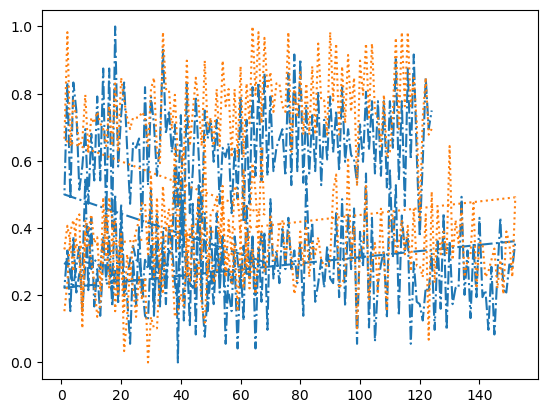

In [49]:
plt.plot(df["Sample Number"], minMaxDf["Body Mass (g)"], label="Line1", linestyle="-.")
plt.plot(df["Sample Number"], minMaxDf["Flipper Length (mm)"], label="Line2", linestyle=":")
plt.plot()

[]

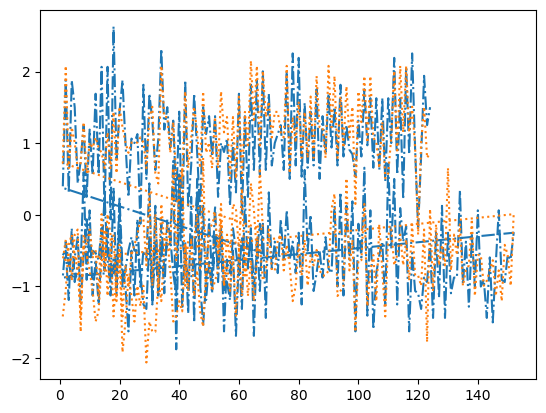

In [43]:
plt.plot(df["Sample Number"], stdScaledDf["Body Mass (g)"], label="Line1", linestyle="-.")
plt.plot(df["Sample Number"], stdScaledDf["Flipper Length (mm)"], label="Line2", linestyle=":")
plt.plot()